In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
genres_ratings_df = pd.read_csv('../data/full_df.csv', index_col='Unnamed: 0')

In [3]:
genres_ratings_df.head()

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Horror,Family,Adventure,Romance,Documentary,Sci-Fi,Action,Thriller,Music,Animation
0,8.3,31,Laiye Je Yaarian,Romance,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,8.9,559,Borderless,Documentary,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,6.4,20,Just Inès,Drama,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,6.5,21,Até Onde?,"Mystery,Thriller",False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [4]:
def genre_descriptive_stats(df, key_col): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[4:] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())

    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [5]:
genre_descrip_df = genre_descriptive_stats(genres_ratings_df, 'numvotes')
display(genre_descrip_df)

,mean,median,standard_deviation
Sport,2886.981900,61.0,20978.125375
Fantasy,12654.448172,85.0,61114.272208
Mystery,8373.535871,112.0,46891.042344
War,3188.078849,81.0,19785.094039
Biography,5584.465536,39.0,39808.707176
Drama,3936.406132,70.0,29309.494527
Comedy,4249.199357,95.0,28139.239252
History,2607.202443,37.0,23051.057476
Crime,8645.817128,160.0,42463.339313
Horror,2963.751847,75.0,18195.366376


In [24]:
genre_descrip_df['mean'].sort_values(ascending=False)

Adventure    22360.306887
Sci-Fi       20083.570029
Action       15019.894996
Name: mean, dtype: float64

In [6]:
genre_descrip_df.index

Index(['Sport', 'Fantasy', 'Mystery', 'War', 'Biography', 'Drama', 'Comedy',
       'History', 'Crime', 'Horror', 'Family', 'Adventure', 'Romance',
       'Documentary', 'Sci-Fi', 'Action', 'Thriller', 'Music', 'Animation'],
      dtype='object')

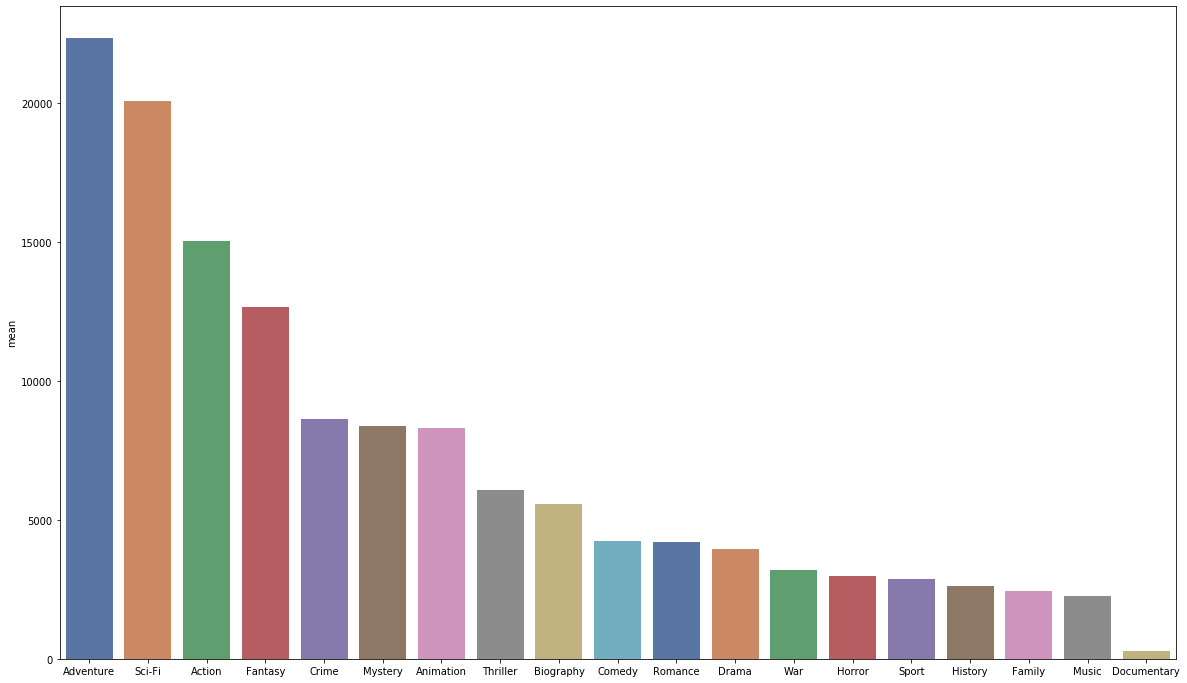

In [53]:
#plotting mean numvotes
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
mean_series_sorted = genre_descrip_df['mean'].sort_values(ascending=False)
sns.barplot(x=mean_series_sorted.index, y=mean_series_sorted, ax=ax, palette='deep')

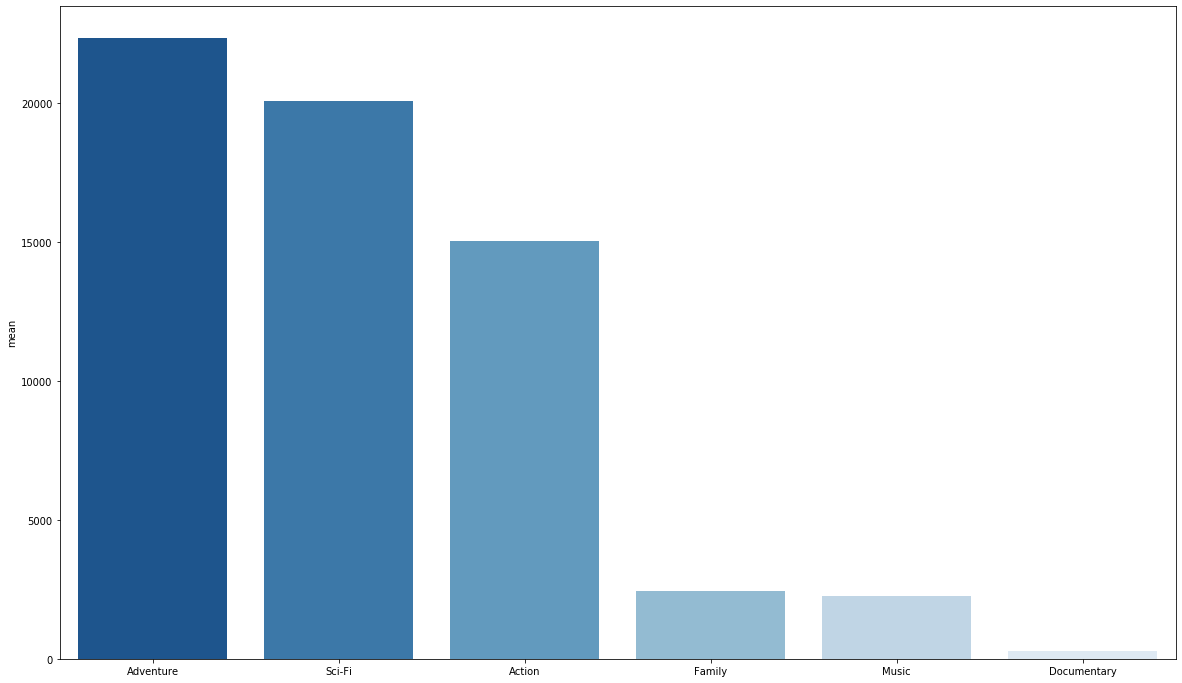

In [50]:
#plotting top 3 and bottom 3 numvotes
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
mean_series_top_bottom = pd.concat([mean_series_sorted.head(3), mean_series_sorted.tail(3)])
sns.barplot(x=mean_series_top_bottom.index, y=mean_series_top_bottom, ax=ax, palette=sns.color_palette("Blues_r"))

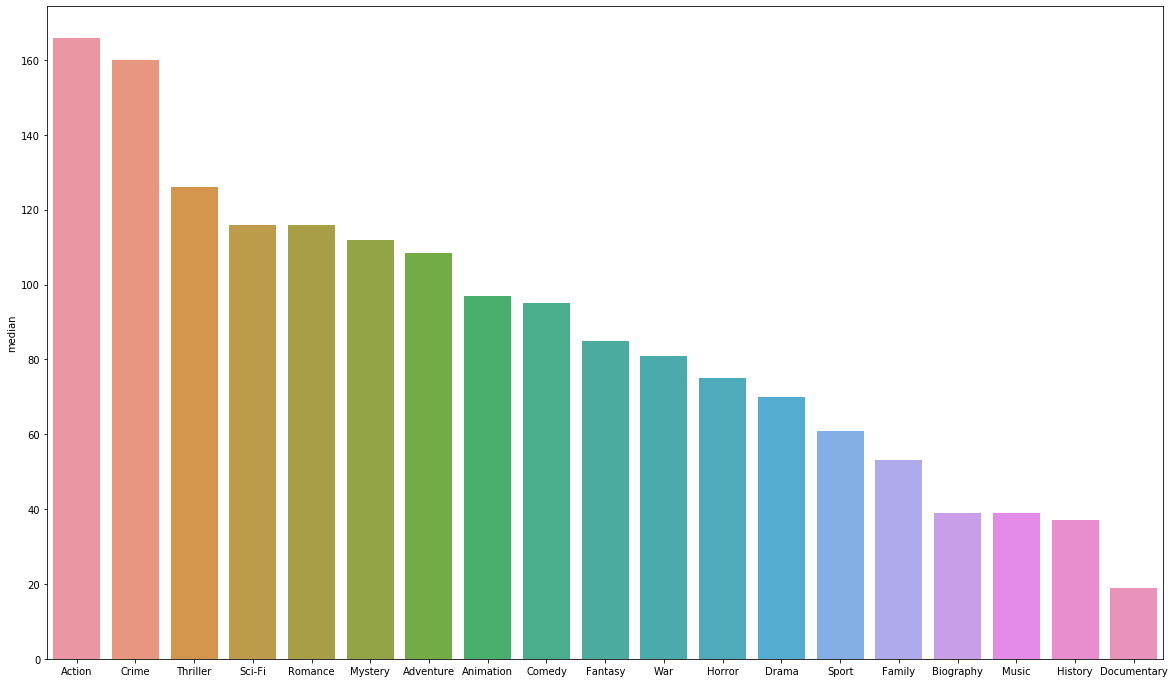

In [21]:
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
med_series_sorted = genre_descrip_df['median'].sort_values(ascending=False)
sns.barplot(x=med_series_sorted.index, y=med_series_sorted, ax=ax)